<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-summary.ipynb)

The previous notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-32-school-districts-and-d5-part-2.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import numpy as np,pandas as pd,geopandas as gpd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import \
minmax_scale,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,\
median_absolute_error,mean_absolute_error,\
r2_score,explained_variance_score
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tkl
import tensorflow.keras.callbacks as tkc

In [3]:
style_dict={'background-color':'slategray','color':'#37c9e1',
            'border-color':'white','font-family':'Roboto'}
style_dict2={'opacity':'.9','font-family':'Roboto',
             'color':'black','font-size':'110%'}
plt.style.use('seaborn-whitegrid')

In [4]:
def regression(regressor,x_train,x_test,y_train):
    regressor.fit(x_train,y_train)    
    y_train_reg=regressor.predict(x_train)
    y_test_reg=regressor.predict(x_test)    
    return y_train_reg,y_test_reg
def scores(regressor,y_train,y_test,y_train_reg,y_test_reg):
    print(50*"_"); print(regressor); print(50*"_")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"-")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"-")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"-")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"-")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))

In [5]:
def nn_scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(10,8)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE")
    plt.legend(); plt.title('Mean Absolute Error')
    plt.tight_layout(); plt.show() 

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>All Notebooks</summary><br/>

&#x1F4D8; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)
    
&#x1F4D8; &nbsp; [PASSNYC. Data Exploration R](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration-r)

&#x1F4D8; &nbsp;  [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)
    
&#x1F4D8; &nbsp;  [PASSNYC. Numeric and Categorical Variables R](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables-r)

&#x1F4D8; &nbsp;  [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp;  [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

&#x1F4D8; &nbsp;  [PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks)

&#x1F4D8; &nbsp;  [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)

&#x1F4D8; &nbsp; [PASSNYC. 32 School Districts and D5. Part 2](https://lww.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2)


<details><summary style='color:#37c9e1; font-family:Orbitron;'>All Datasets</summary><br/>
    
&#x1F4C2; &nbsp; [PASSNYC: Data Science for Good Challenge](https://www.kaggle.com/passnyc/data-science-for-good)

&#x1F4C2; &nbsp; [NY 2010 - 2016 School Safety Report](https://www.kaggle.com/new-york-city/ny-2010-2016-school-safety-report)

&#x1F4C2; &nbsp; [NYC High School Directory](https://www.kaggle.com/new-york-city/nyc-high-school-directory)

&#x1F4C2; &nbsp; [AP (College Board) NY School Level Results](https://www.kaggle.com/new-york-city/ap-college-board-ny-school-level-results)

&#x1F4C2; &nbsp; [New York City SAT Results](https://www.kaggle.com/new-york-city/new-york-city-sat-results)

&#x1F4C2; &nbsp; [NY School Districts](https://www.kaggle.com/olgabelitskaya/ny-school-districts)


<p style='color:slategray;'>The main goal of these notebooks is to find a way for effective visualization of public data for identifying students within New York City’s under-performing school districts and methods for increasing the diversity of students taking the Specialized High School Admissions Test (SHSAT).<br/><br/>
It could help to improve the chances of students taking the SHSAT and receiving placements in specialized high schools.<br/><br/>
Visualization allows different categories of people (analysts, educators, parents, students, investors) to detect the problems and find the decisions immediately in many practical cases.</p>

In [6]:
dir1='../input/data-science-for-good/'
dir2='../input/ny-2010-2016-school-safety-report/'
dir3='../input/nyc-high-school-directory/'
dir4='../input/ap-college-board-ny-school-level-results/'
dir5='../input/new-york-city-sat-results/'
dir6='../input/ny-school-districts/'
school_explorer=pd.read_csv(
    dir1+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(
    dir1+'D5 SHSAT Registrations and Testers.csv')
safety=pd.read_csv(
    dir2+'2010-2016-school-safety-report.csv')
high_school=pd.read_csv(
    dir3+'2016-doe-high-school-directory.csv')
sat_2010=pd.read_csv(
    dir4+'2010-sat-college-board-school-level-results.csv')
ap_2010=pd.read_csv(
    dir4+'2010-ap-college-board-school-level-results.csv')
sat_2012=pd.read_csv(dir5+'2012-sat-results.csv')
[school_explorer.shape,d5_shsat.shape,sat_2010.shape,
 sat_2012.shape,high_school.shape,safety.shape]

[(1272, 161), (140, 7), (460, 6), (478, 6), (437, 67), (6310, 34)]

In [7]:
school_explorer.iloc[:3,:10].style.set_properties(**style_dict)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full)
0,nan,nan,nan,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009"
1,nan,nan,nan,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003"
2,nan,nan,nan,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002"


In [8]:
d5_shsat.head(3).style.set_properties(**style_dict)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10


In [9]:
safety.iloc[:3,:10].style.set_properties(**style_dict)

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.000000,712,nan
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.000000,231,nan
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.000000,450,nan


In [10]:
high_school.iloc[:3,:10].style.set_properties(**style_dict)

,dbn,school_name,borough,building_code,shared_space,phone_number,fax_number,school_email,grade_span_min,grade_span_max
0,01M292,Henry Street School for International Studies,Manhattan,M056,Yes,212-406-9411,212-406-9417,cloughl@schools.nyc.gov,6.000000,12
1,01M448,University Neighborhood High School,Manhattan,M446,No,212-962-4341,212-267-5611,ransonunhs@gmail.com,9.000000,12
2,01M450,East Side Community School,Manhattan,M060,Yes,212-460-8467,212-260-9657,tomm@eschs.org,6.000000,12


In [11]:
sat_2010.head(3).style.set_properties(**style_dict)

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.000000,391.000000,425.000000,385.000000
1,01M448,University Neighborhood High School,60.000000,394.000000,419.000000,387.000000
2,01M450,East Side Community High School,69.000000,418.000000,431.000000,402.000000


In [12]:
ap_2010.head(3).style.set_properties(**style_dict)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,10.000000
1,01M450,EAST SIDE COMMUNITY HS,19.000000,21.000000,nan
2,01M515,LOWER EASTSIDE PREP,24.000000,26.000000,24.000000


In [13]:
sat_2012.head().style.set_properties(**style_dict)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-1</h1>

[PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration) 
<p style='color:slategray;'>is the first look at the main dataset => finding the groups of the variables and the best ways to present them.<br/><br/>
Here are the following parts of features with charactericrics of the school education process:<br/></p>

- identification variables 
  - `School Name`, `SED Code`, `Location Code`;
- administrative affiliation variables 
  - `Address (Full)`, `City`, `Zip`, `District`;
- geographic variables 
  - `Latitude`, `Longitude`;
- demographic variables 
  - `Percent Asian`, `Percent Black`, etc.;
- education indicators 
  - `Average Math Proficiency`, `Average ELA Proficiency`, 
  - `Grade 3 ELA 4s - All Students`, `Grade 3 Math 4s - All Students`, etc.;
- social environment variables 
  - `Rigorous Instruction %`, `Rigorous Instruction Rating`, 
  - `Collaborative Teachers %`, `Collaborative Teachers Rating`, etc.; 
- economic indicators 
  - `Economic Need Index`, `School Income Estimate`;
- student discipline indicators 
  - `Student Attendance Rate`, `Percent of Students Chronically Absent`;
- school types indicators 
  - `Community School?`, `Grades`, `Grade Low`, `Grade High`;
- biases in learning outcomes
  - `Grade 3 ELA 4s - American Indian or Alaska Native`,
  - `Grade 3 Math 4s - Limited English Proficient`, etc.;
- SHSAT results 
  - `Number of students who registered for the SHSAT`,
  - `Number of students who took the SHSAT`.
  
<p style='color:slategray;'>The dataset consists from two files:</p>

- `2016 School Explorer.csv` => 1272 schools and 161 variables
  
- `D5 SHSAT Registrations and Testers.csv` => 28 schools and 7 variables
  
<p style='color:slategray;'>There are 21 intersections in two files so it is possible to analyze these schools using merged information.</p>

In [14]:
print('The schools in the 5th District in both files: \n',
      set(d5_shsat['DBN'])\
      .intersection(set(school_explorer['Location Code'])))

The schools in the 5th District in both files: 
 {'05M302', '84M336', '05M161', '05M148', '84M284', '84M065', '05M129', '05M362', '84M481', '84M341', '05M670', '05M514', '84M350', '84M384', '84M709', '05M123', '05M046', '84M388', '84M726', '05M499', '05M286'}


<p style='color:slategray;'>The tasks of financial support are easily seen in the two graphs.<br/></p>

In the first one, we can see that most schools have indicators `Average ELA Proficiency` & `Average Math Proficiency` below the mean, hence, in the long term, it is necessary to change this trend and increase their number in the interval from 2.5 to 3.5. Of course, the higher levels will lead to increasing the number of successful students in SHSAT in general.

<p style='color:slategray;'>In the second one, we can find the tasks for the short term - organizations like PASSNYC could pay attention at three groups of schools:<br/></p>

- in the left top corner: the economically disadvantaged students differ from the environment with low  `Economic Need Index` and may need help to participate in learning programs;

- in the right top corner: the schools with high results and high `Economic Need Index` can increase the number of advanced courses and successful students by additional finance;

- in the right bottom corner: it seems like the schools here have no chance to overcome the situation without investments.

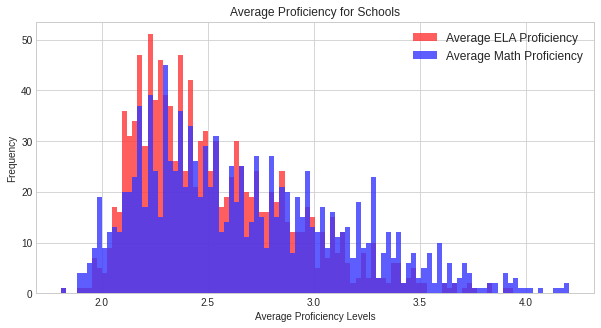

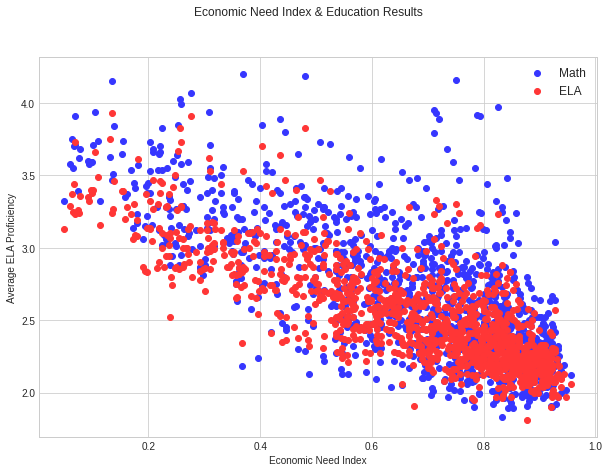

In [15]:
fig,ax=plt.subplots(1,figsize=(10,7))
school_explorer[['Average ELA Proficiency','Average Math Proficiency']]\
.plot.hist(bins=100,alpha=.8,figsize=(10,5),ax=ax,
           color=['#ff3636','#3636ff'],
           title='Average Proficiency for Schools')
ax.set_xlabel('Average Proficiency Levels')
ax.legend(fontsize=12)
fig,ax=plt.subplots(1,figsize=(10,7))
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average Math Proficiency'],
           label='Math',color='#3636ff')
ax.scatter(school_explorer['Economic Need Index'],
           school_explorer['Average ELA Proficiency'],
           label='ELA',color='#ff3636')
ax.set_xlabel('Economic Need Index')
ax.set_ylabel('Average ELA Proficiency')
ax.legend(fontsize=12)
plt.suptitle('Economic Need Index & Education Results');

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-2</h1>

[PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables) 
<p style='color:slategray;'>is the second look at the main dataset => dividing the variables into numeric and categorical types and preprocess them.<br/><br/>
For filling the missing values in the numeric case was used the interpolation method, in the categorical case - the most common values.</p>

In [16]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [17]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/ d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x: round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+\
                         numeric_list+category_list+target_list],
                         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

In [18]:
geo_districts=gpd.GeoDataFrame.from_file(dir6+"nysd.shp") # EPSG:2263
geo_districts=geo_districts.to_crs(epsg=4326).sort_values('SchoolDist')
geo_districts=geo_districts.reset_index(drop=True)
districts=school_explorer[numeric_list+target_list]\
.groupby(school_explorer['District']).mean().sort_index()
districts=districts.append(districts.loc[9]).sort_index()
districts=districts.reset_index(drop=True)
districts=pd.concat([geo_districts,districts],axis=1)
districts.shape

(33, 144)

<p style='color:slategray;'>The correlation of variables with educational results also was discovered and represented.<br/></p>

It cannot be proved that levels of `Economic Need Index` and `Percent Black / Hispanic` are causes of the level of `Average Math Proficiency` and `Average ELA Proficiency`, but they are correlated with educational results too strongly.

In [19]:
corr_matrix=school_explorer[numeric_list+target_list]\
            .corr(method='pearson')
corr_math=corr_matrix.iloc[-1][:-1]
corr_math30=corr_math[abs(corr_math).argsort()[::-1]][:30]
corr_ela=corr_matrix.iloc[-2]\
[corr_matrix.columns!='Average ELA Proficiency']
corr_ela30=corr_ela[abs(corr_ela).argsort()[::-1]][:30]

In [20]:
corr_math30.to_frame().style\
.bar(align='mid',color=['#3636ff','#ff3636'])\
.set_properties(**style_dict2)

,Average Math Proficiency
Average ELA Proficiency,0.935253
Percent Black / Hispanic,-0.718155
Economic Need Index,-0.704222
Student Attendance Rate,0.679338
Grade 5 Math 4s - All Students,0.625105
Grade 3 Math 4s - All Students,0.623729
Grade 4 Math 4s - All Students,0.617929
Grade 5 ELA 4s - All Students,0.608659
Grade 4 ELA 4s - All Students,0.599617
Grade 3 ELA 4s - All Students,0.576874


In [21]:
corr_ela30.to_frame().style\
.bar(align='mid',color=['#3636ff','#ff3636'])\
.set_properties(**style_dict2)

,Average ELA Proficiency
Average Math Proficiency,0.935253
Economic Need Index,-0.794865
Percent Black / Hispanic,-0.732782
Student Attendance Rate,0.637642
Percent White,0.631241
School Income Estimate,0.601464
Grade 5 ELA 4s - All Students,0.574409
Grade 4 ELA 4s - All Students,0.542865
Grade 5 Math 4s - All Students,0.540469
Grade 3 ELA 4s - All Students,0.534498


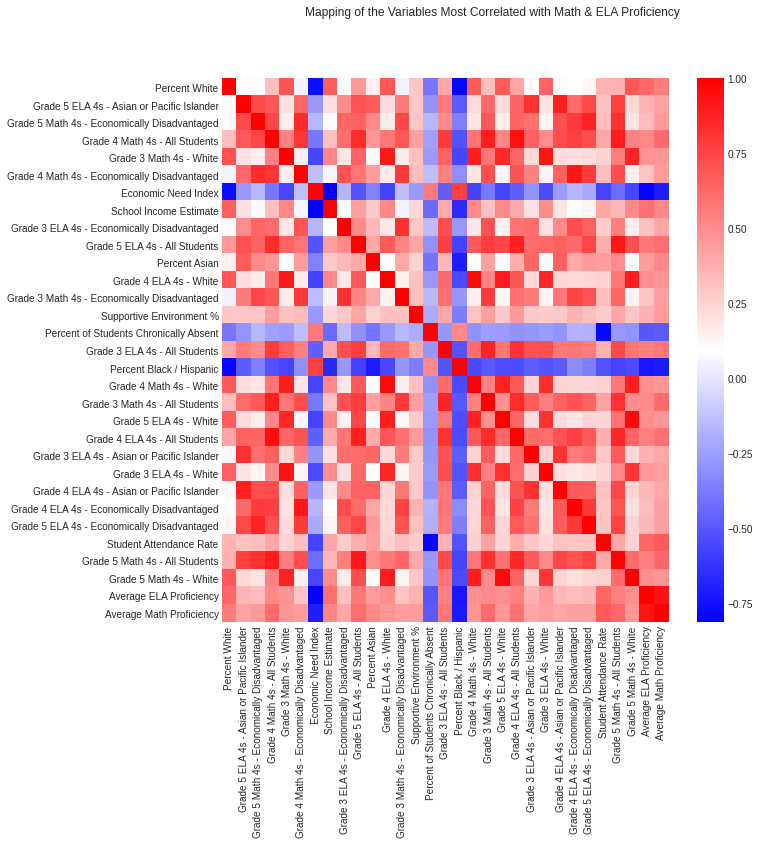

In [22]:
fig,ax=plt.subplots(1,figsize=(10,10))
corr_id=list(set(corr_math30.index)\
             .intersection(set(corr_ela.index)))+\
        target_list
sns.heatmap(corr_matrix.loc[corr_id,corr_id], 
            ax=ax,cmap='bwr')
plt.suptitle('Mapping of the Variables Most Correlated '+\
             'with Math & ELA Proficiency');

<p style='color:slategray;'>It was also shown the possibility to divide schools into 10 clusters based on variables.<br/><br/>
The principles of algorithmic clustering for schools can be represented by the next table:<br/></p>

- low levels of `Economic Need Index` and student absence and 

- high educational results correspond to the highest cluster index.

<p style='color:slategray;'>Of course, for schools in the cluster #0, it needs a lot of attention to move them ahead on the cluster scale.<br/></p>

It seems like the certain tendency of cluster biases in the `Percent Black / Hispanic` variable really exists.

In [23]:
X=school_explorer[numeric_list+target_list]
n_clusters=10
clf=KMeans(n_clusters=n_clusters,random_state=23)
cluster_labels=clf.fit_predict(np.array(X))
school_explorer['Education Clusters']=cluster_labels
indices=list(X.groupby(school_explorer['Education Clusters']).mean()\
             .sort_values('Average Math Proficiency').index)
feature_pairs=dict(zip(indices,range(10,20)))
school_explorer['Education Clusters']\
.replace(feature_pairs,inplace=True)
feature_pairs=dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters']\
.replace(feature_pairs,inplace=True)
school_explorer[['Economic Need Index',
                 'Percent of Students Chronically Absent',
                 'Percent Black / Hispanic']+target_list]\
.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')\
.style.background_gradient(cmap='bwr')\
.set_properties(**style_dict2)

,Economic Need Index,Percent of Students Chronically Absent,Percent Black / Hispanic,Average ELA Proficiency,Average Math Proficiency
Education Clusters,,,,,
0,0.858747,30.511583,94.281853,2.301963,2.388153
1,0.794463,26.268340,88.594595,2.399799,2.528166
2,0.712278,20.831284,77.368852,2.477018,2.617524
3,0.638041,16.955044,65.578947,2.576549,2.733528
4,0.547003,17.201389,58.708333,2.654618,2.815799
5,0.430278,13.406977,51.186047,2.799863,2.935799
6,0.345852,13.440299,35.895522,2.904515,3.105560
7,0.330150,11.087500,30.600000,3.030000,3.218875
8,0.189111,6.194444,16.888889,3.286111,3.451944


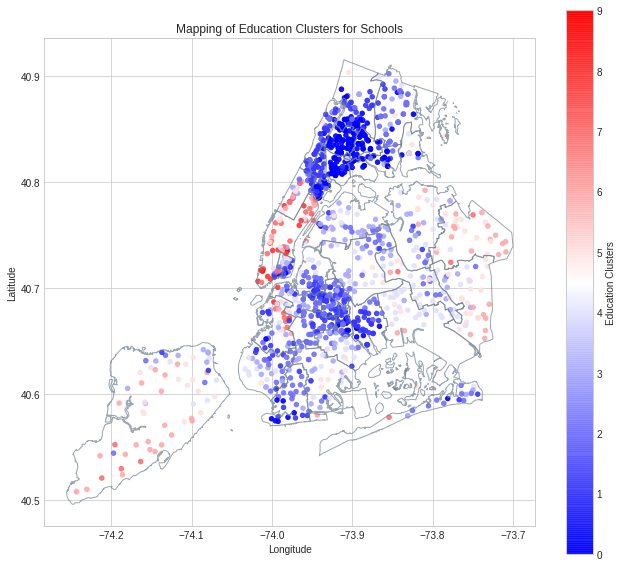

In [24]:
fig,ax=plt.subplots(1,figsize=(11,10))
school_explorer.plot(kind="scatter",x="Longitude",y="Latitude",
                     s=20, c="Education Clusters", ax=ax,
                     title='Mapping of Education Clusters for Schools',
                     cmap=plt.cm.bwr,colorbar=True,alpha=.9);
districts.plot(ax=ax,facecolor='none',alpha=.7,
               edgecolor='slategray');

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-3</h1>

[PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)
<p style='color:slategray;'>is the third look at the main dataset (with additional datasets) => data analyzing with regional and time specifics.</p>

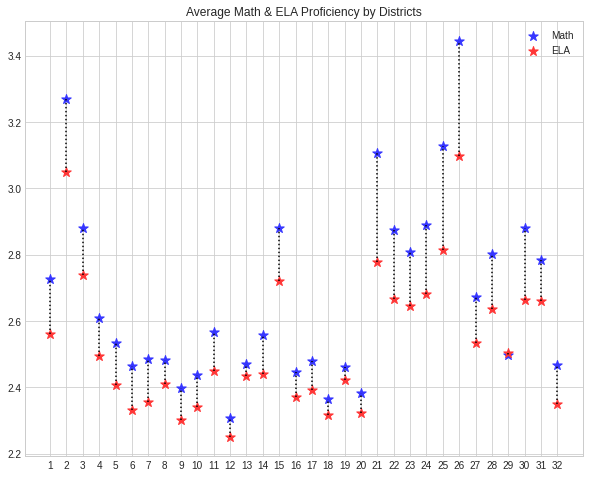

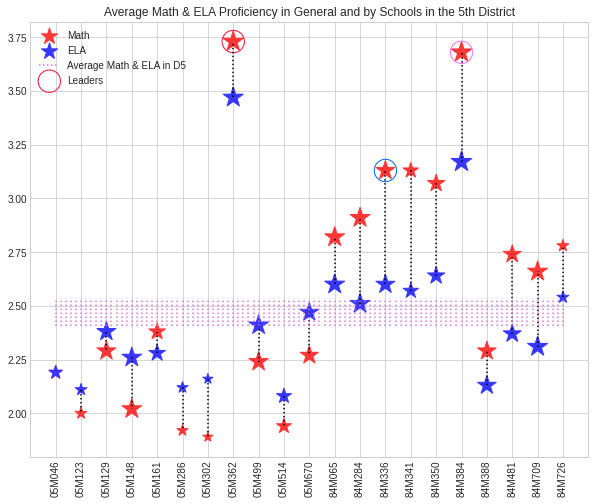

In [25]:
fig,ax=plt.subplots(1,figsize=(10,8))
avg_maths=districts['Average Math Proficiency'].drop([10])
avg_ela=districts['Average ELA Proficiency'].drop([10])
ax.scatter(range(1,33),avg_maths,marker='*',
           s=100,label='Math',c='#3636ff')
ax.scatter(range(1,33),avg_ela,marker='*',
           s=100,label='ELA',c='#ff3636')
plt.vlines(range(1,33),avg_ela,avg_maths,linestyle="dotted")
ax.legend(); ax.set_xticks(list(range(1,33)))
ax.tick_params('x',rotation=0)
plt.title('Average Math & ELA Proficiency by Districts')
fig,ax=plt.subplots(1,figsize=(10,8))
avg_maths2=d5_shsat_2016['Average Math Proficiency']
avg_ela2=d5_shsat_2016['Average ELA Proficiency']
took=d5_shsat_2016['Took SHSAT %']
ax.scatter(range(1,22),avg_maths2,marker='*',
           s=took*500,label='Math',c='#ff3636')
ax.scatter(range(1,22),avg_ela2,marker='*',
           s=took*500,label='ELA',c='#3636ff')
plt.vlines(range(1,22),avg_ela2,avg_maths2,linestyle="dotted")
plt.vlines(np.arange(1.,21.2,.2),avg_ela[4],avg_maths[4],
           colors='orchid',linestyle="dotted",
           label='Average Math & ELA in D5')
ax.scatter([8,14,17],avg_maths2[[7,13,16]],label='Leaders',s=500,
           facecolors='none',edgecolors=['#fd0e35','#0066ff','#fc74fd'])
ax.legend(loc=2)
ax.set_xticks(range(1,22))
ax.set_xticklabels(list(d5_shsat_2016['Location Code']),rotation=90)
plt.title('Average Math & ELA Proficiency in General '+\
          'and by Schools in the 5th District');

In [26]:
def highlight(df):
    if df['Economic Need Index'] < 0.6:
        return ['background-color:#fd0e35']
    elif df['Economic Need Index'] > 0.79:
        return ['background-color:#0066ff']
    else:
        return ['background-color:#fc74fd']    
pd.DataFrame(
    d5_shsat_2016['Economic Need Index'].loc[[7,13,16]])\
    .set_index(
        [d5_shsat_2016['Location Code'].loc[[7,13,16]]])\
    .style.apply(highlight,axis=1)\
    .set_properties(**style_dict2)

,Economic Need Index
Location Code,
05M362,0.507000
84M336,0.798000
84M384,0.734000


<p style='color:slategray;'>And we could recognize the schools that need help in general.<br/>Maybe, a whole additional program for all students.</p>

In [27]:
pd.DataFrame(
    d5_shsat_2016['Economic Need Index'].loc[[0,1,5,6,9]])\
    .set_index(
        [d5_shsat_2016['Location Code'].loc[[0,1,5,6,9]]])\
    .sort_values('Economic Need Index',ascending=False)\
    .style.background_gradient(cmap='bwr')\
    .set_properties(**style_dict2)

,Economic Need Index
Location Code,
05M046,0.903000
05M514,0.881000
05M302,0.852000
05M123,0.835000
05M286,0.817000


<p style='color:slategray;'>Other datasets were added to catch possible tendencies in time periods.</p>

In [28]:
sat_2010.rename(columns={'DBN':'Location Code'},inplace=True)
ap_2010.rename(columns={'DBN':'Location Code'},inplace=True)
sat_2012.rename(columns={'DBN':'Location Code'},inplace=True)
res_2010=pd.merge(ap_2010, sat_2010,on='Location Code').dropna()
res_2010=res_2010.drop(['SchoolName'],axis=1)
re_dict={'AP Test Takers ':'AP Test Takers 2010',
         'Number of Test Takers':'Number of Test Takers 2010',
         'Critical Reading Mean':'Critical Reading Mean 2010',
         'Mathematics Mean':'Mathematics Mean 2010',
         'Writing Mean':'Writing Mean 2010'} 
res_2010.rename(columns=re_dict,inplace=True)
res_2010['AP Exam Ratio 2010']=\
res_2010['Number of Exams with scores 3 4 or 5']/\
res_2010['Total Exams Taken']
res_2010=res_2010.drop(['Total Exams Taken'],axis=1)
res_2010=res_2010.drop(['Number of Exams with scores 3 4 or 5'],axis=1)
res_2010_2012=pd.merge(res_2010, sat_2012, on='Location Code').dropna()
res_2010_2012=res_2010_2012.drop(['School Name'],axis=1)
re_dict={'Num of SAT Test Takers':'Num of SAT Test Takers 2012',
         'SAT Critical Reading Avg. Score':'SAT Critical Reading Avg. Score 2012',
         'SAT Math Avg. Score':'SAT Math Avg. Score 2012',
         'SAT Writing Avg. Score':'SAT Writing Avg. Score 2012'}
res_2010_2012.rename(columns=re_dict,inplace=True)
tend_list=['SAT Critical Reading Avg. Score 2012',
           'SAT Math Avg. Score 2012',
           'SAT Writing Avg. Score 2012']
for s in tend_list:
    res_2010_2012[s]=res_2010_2012[s].astype(float)  
res_2010_2012_2016=\
pd.merge(school_explorer[['Location Code','District','City',
                          'Longitude','Latitude',
                          'Average ELA Proficiency',
                          'Average Math Proficiency']],
         res_2010_2012,on='Location Code').dropna() 
re_dict={'Average ELA Proficiency':'Average ELA Proficiency 2016',
         'Average Math Proficiency':'Average Math Proficiency 2016'}
res_2010_2012_2016.rename(columns=re_dict,inplace=True)
norm_res_2010_2012_2016=\
pd.DataFrame(minmax_scale(res_2010_2012_2016\
                          .iloc[:,[5,6,9,10,11,12,15,16,17]]),
             columns=list(res_2010_2012_2016\
                          .columns[[5,6,9,10,11,12,15,16,17]]))
res_2010.shape,res_2010_2012.shape,res_2010_2012_2016.shape

((148, 8), (148, 12), (22, 18))

<p style='color:slategray;'>The measuring system of educational results was transformed, so the comparison was made by scaling on the segment [0;1]. In this case, it is possible to assess how the success of each particular school has changed with respect to the situation in the region or in the district.
<br/><br/>
A very dangerous tendency we can see here also. The schools with low indicators move down more and more. 
<br/><br/>
The huge difference in the best and the worst schools (according to success indicators) could affect the educational system in general and put it down even when many good schools improve their methods and results.
<br/><br/>
The finding it is a real failure or it happens just because of changing the measuring system could be the most important exploring in education biases.</p>

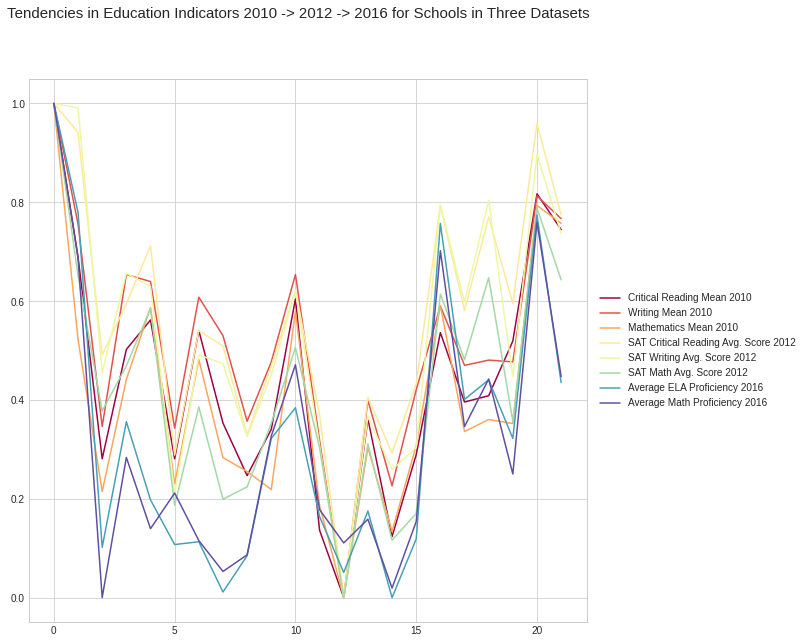

In [29]:
fig=plt.figure(figsize=(10,10)) 
ax=fig.gca()
plt.suptitle('Tendencies in Education Indicators 2010 '+\
             '-> 2012 -> 2016 for Schools in Three Datasets',
            fontsize=15)
tend_list=['Critical Reading Mean 2010', 
           'Writing Mean 2010',
           'Mathematics Mean 2010',
           'SAT Critical Reading Avg. Score 2012',
           'SAT Writing Avg. Score 2012',
           'SAT Math Avg. Score 2012',
           'Average ELA Proficiency 2016',
           'Average Math Proficiency 2016']
norm_res_2010_2012_2016[tend_list]\
.plot(ax=ax,cmap=plt.cm.Spectral)
ax.legend(loc=10, bbox_to_anchor=(1.2,.5));

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-4</h1>

[PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods) <p style='color:slategray;'>is tries of detecting more deeply => are the guesses about biases in education reflect the real processes.<br/></p>

Usage the set of regression algorithms from the library [scikit-learn](http://scikit-learn.org/stable/) is very suitable in this case. 

The `Gradient Boosting` algorithm has shown an ability to predict levels of educational results <br/>  based on numeric variables in this dataset. 

<p style='color:slategray;'>Other regressors have the similarity in scores.</p>

In [30]:
features=school_explorer[numeric_list].values
targets1=school_explorer['Average Math Proficiency'].values
targets2=school_explorer['Average ELA Proficiency'].values
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features,targets1,test_size=.2,random_state=1)
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features,targets2,test_size=.2,random_state=1)
df_importance=pd.DataFrame(columns=numeric_list)
df_importance.loc[0]=\
GradientBoostingRegressor(max_depth=4,n_estimators=138)\
.fit(X_train1,y_train1).feature_importances_
df_importance.loc[1]=\
GradientBoostingRegressor(max_depth=5,n_estimators=276)\
.fit(X_train2,y_train2).feature_importances_

In [31]:
y_train_gbr1,y_test_gbr1=regression(
    GradientBoostingRegressor(max_depth=4,n_estimators=138), 
    X_train1,X_test1,y_train1)
scores('Gradient Boosting Regressor \n'+\
       'Average Math Proficiency Predictions', 
       y_train1,y_test1,y_train_gbr1,y_test_gbr1)
y_train_gbr2,y_test_gbr2=regression(
    GradientBoostingRegressor(max_depth=5,n_estimators=276), 
    X_train2,X_test2,y_train2)
scores('Gradient Boosting Regressor \n'+\
       'Average ELA Proficiency Predictions', 
       y_train2,y_test2,y_train_gbr2,y_test_gbr2)

__________________________________________________
Gradient Boosting Regressor 
Average Math Proficiency Predictions
__________________________________________________
EV score. Train:  0.9815852114203323
EV score. Test:  0.8935529914746291
--------------------
R2 score. Train:  0.9815852114203323
R2 score. Test:  0.8935525655365589
--------------------
MSE score. Train:  0.004013459926885173
MSE score. Test:  0.0227252893228014
--------------------
MAE score. Train:  0.04885991734938186
MAE score. Test:  0.11450100116648164
--------------------
MdAE score. Train:  0.0398670038457154
MdAE score. Test:  0.08646757752104639
__________________________________________________
Gradient Boosting Regressor 
Average ELA Proficiency Predictions
__________________________________________________
EV score. Train:  0.9991811900451312
EV score. Test:  0.8689753948575647
--------------------
R2 score. Train:  0.9991811900451312
R2 score. Test:  0.8688376405384427
--------------------
MSE score. Trai

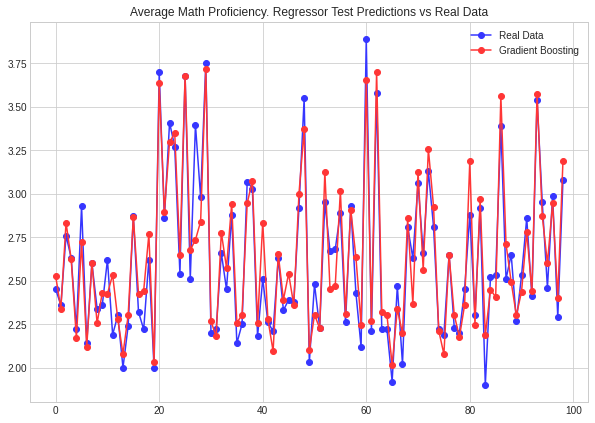

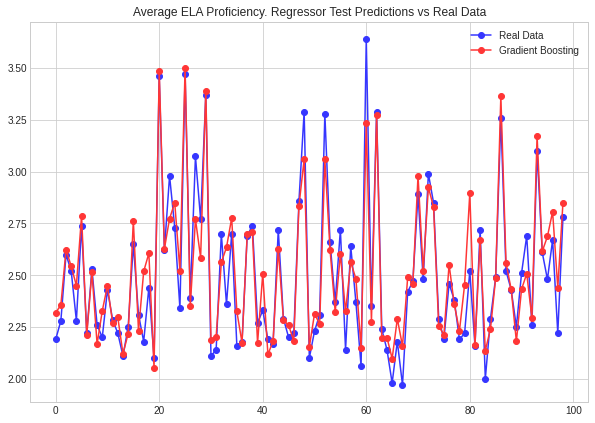

In [32]:
plt.figure(figsize=(10,7))
plt.plot(y_test1[1:100],'-o',
         c='#3636ff',label='Real Data')
plt.plot(y_test_gbr1[1:100],'-o',
         c='#ff3636',label='Gradient Boosting')
plt.legend()
plt.title('Average Math Proficiency. '+\
          'Regressor Test Predictions vs Real Data')
plt.figure(figsize=(10,7))
plt.plot(y_test2[1:100],'-o',
         c='#3636ff',label='Real Data')
plt.plot(y_test_gbr2[1:100],'-o',
         c='#ff3636',label='Gradient Boosting')
plt.legend()
plt.title('Average ELA Proficiency. '+\
          'Regressor Test Predictions vs Real Data');

<p style='color:slategray;'>Based on many experiments with regression algorithms,<br/><br/> the list of the most influential variables for the educational results looks like this:</p>

- Financial: `Economic Need Index`
- Social: `Supportive Environment`
- Organizational: `Student Attendance Rate`
- Linguistical: `Percent ELL`
- Ethnical: `Percent Black / Hispanic`

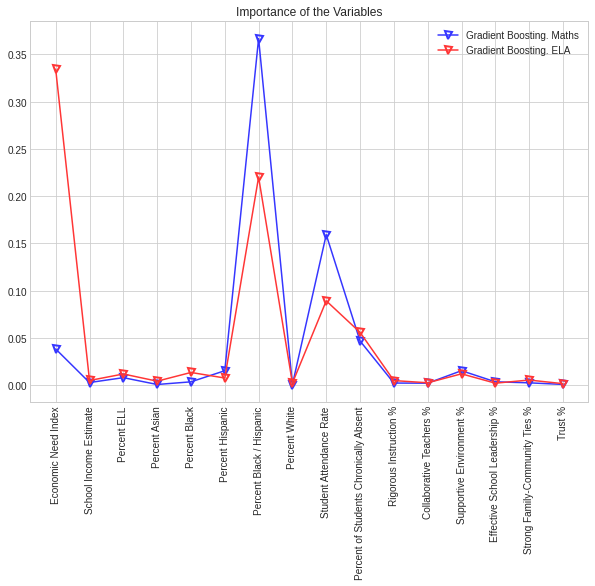

In [33]:
fig,ax=plt.subplots(1,figsize=(10,7))
ax.plot(range(16),
        df_importance.loc[0][df_importance.columns[2:18]],
        '-v',c='#3636ff',label='Gradient Boosting. Maths',
        markersize=7,markerfacecolor="None",markeredgewidth=2)
ax.plot(range(16),
        df_importance.loc[1][df_importance.columns[2:18]],
        '-v',c='#ff3636',label='Gradient Boosting. ELA',
        markersize=7,markerfacecolor="None",markeredgewidth=2)
plt.legend(); ax.set_xticks(range(16))
ax.set_xticklabels(list(df_importance.columns[2:18]),
                   rotation=90)
plt.title("Importance of the Variables");

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-5</h1>

[PASSNYC. Neural Networks](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks) 

<p style='color:slategray;'>is the fifth step in this exploration => applying neural networks for predictions of financial situation.</p>

The python module [Keras](https://keras.io/) was used here.

In [34]:
features=school_explorer[numeric_list+target_list]\
.drop(['Economic Need Index',
       'School Income Estimate'],axis=1).values
targets=school_explorer['Economic Need Index'].values
X_train,X_test,y_train,y_test=\
train_test_split(features,targets,
                 test_size=.3,random_state=1)
n=int(len(X_test)/2)
X_valid,y_valid=X_test[:n],y_test[:n]
X_test,y_test=X_test[n:],y_test[n:]
def mlp_model():
    model=Sequential()
    model.add(tkl.Dense(138,input_dim=138))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(138))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(138*16))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(138*16))
    model.add(tkl.LeakyReLU(alpha=.02))   
    model.add(tkl.Dense(1))
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model=mlp_model()
mlp_lr_reduction=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,verbose=2,factor=.2)

In [35]:
mlp_history=mlp_model.fit(
    X_train,y_train,
    epochs=30,batch_size=16,verbose=2,
    validation_data=(X_valid,y_valid),
    callbacks=[mlp_lr_reduction])

Epoch 1/30
56/56 - 2s - loss: 4487.7339 - mae: 11.2957 - val_loss: 2.3496 - val_mae: 1.2161
Epoch 2/30
56/56 - 2s - loss: 2.3373 - mae: 0.8908 - val_loss: 0.8075 - val_mae: 0.6242
Epoch 3/30
56/56 - 2s - loss: 0.3902 - mae: 0.4129 - val_loss: 0.6463 - val_mae: 0.7557
Epoch 4/30
56/56 - 2s - loss: 0.5948 - mae: 0.4468 - val_loss: 0.0952 - val_mae: 0.2381
Epoch 5/30
56/56 - 2s - loss: 0.1759 - mae: 0.2805 - val_loss: 0.1474 - val_mae: 0.3513
Epoch 6/30
56/56 - 2s - loss: 0.0745 - mae: 0.2190 - val_loss: 0.0381 - val_mae: 0.1603
Epoch 7/30
56/56 - 2s - loss: 0.0815 - mae: 0.2087 - val_loss: 0.0592 - val_mae: 0.1980
Epoch 8/30
56/56 - 2s - loss: 0.0520 - mae: 0.1691 - val_loss: 0.0710 - val_mae: 0.2385
Epoch 9/30
56/56 - 2s - loss: 0.0420 - mae: 0.1623 - val_loss: 0.0280 - val_mae: 0.1421
Epoch 10/30
56/56 - 2s - loss: 0.0330 - mae: 0.1439 - val_loss: 0.0173 - val_mae: 0.1011
Epoch 11/30
56/56 - 2s - loss: 0.0241 - mae: 0.1207 - val_loss: 0.0250 - val_mae: 0.1366
Epoch 12/30
56/56 - 2s - l

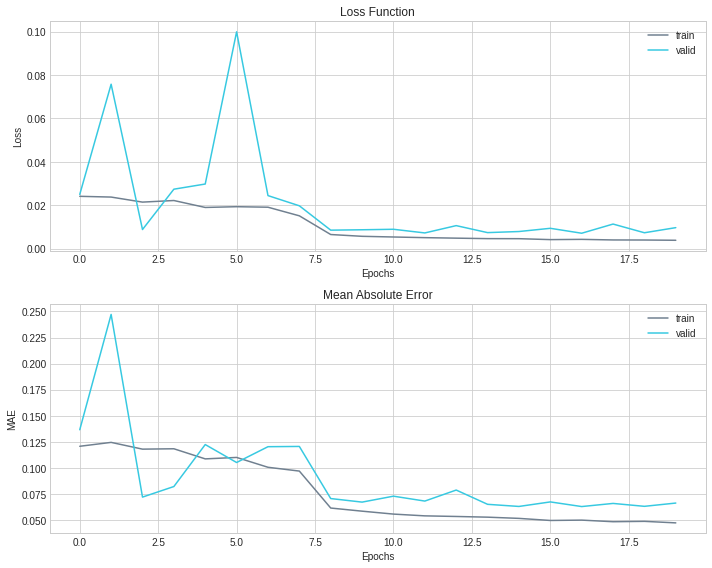

In [36]:
history_plot(mlp_history,10)

In [37]:
y_train_mlp=mlp_model.predict(X_train)
y_valid_mlp=mlp_model.predict(X_valid)
y_test_mlp= mlp_model.predict(X_test)
nn_scores('MLP; Economic Need Index', 
          y_train,y_valid,y_test,
          y_train_mlp,y_valid_mlp,y_test_mlp)

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9289300854705809
EV score. Valid:  0.8135917572159168
EV score. Test:  0.5797756722268659
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9287950106018354
R2 score. Valid:  0.8135129925412093
R2 score. Test:  0.5785073017152227
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0030007734344982035
MSE score. Valid:  0.009676585903921488
MSE score. Test:  0.018386601180450216
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.04123563759400604
MAE score. Valid:  0.0662862885806573
MAE score. Test:  0.0736040408321076
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.03131056356430051
MdAE score. Valid:  0.049345111846923806
MdAE score. Test:  0.05239840936660767


Characteristics of the educational process, social environment, ethnic composition, administrative affiliation <br/> are sufficient to predict the level of  `Economic Need Index`.

The similar experiments show that for predicting `School Income Estimate` information is not enough and <br/> can be supplemented with indicators of economic activity in general for the state and <br/> the economic situation in the district adjacent to the school.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-6</h1>

[PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2) 

<p style='color:slategray;'>is the next step in the exploration => applying neural networks for prediction of educational outcomes.</p>

The python module [Keras](https://keras.io/) was also used here.

In [38]:
features=school_explorer[numeric_list+category_list]
targets2=school_explorer['Average ELA Proficiency'].values
features_enc=features
encode=OneHotEncoder(sparse=False)
for column in category_list:
    encode.fit(features[[column]])
    transform=encode.transform(features[[column]])
    transform=\
    pd.DataFrame(transform, 
                 columns=[(column+"_"+str(i)) 
                          for i in features[column]\
                          .value_counts().index])
    transform=transform.set_index(features.index.values)    
    features_enc=pd.concat([features_enc,transform],axis=1)
    features_enc=features_enc.drop(column,1)
features_enc=features_enc.values
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features_enc,targets2,
                 test_size=.3,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
def mlp_model2():
    model=Sequential() 
    model.add(tkl.Dense(286,input_dim=286))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(286*4))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(286*16))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dense(1))
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model2=mlp_model2()
mlp_lr_reduction2=tkc.ReduceLROnPlateau(
    monitor='val_loss',patience=5,verbose=2,factor=.2)

In [39]:
mlp_history2=mlp_model2.fit(
    X_train2,y_train2, 
    epochs=100,batch_size=16,verbose=2,
    validation_data=(X_valid2,y_valid2),
    callbacks=[mlp_lr_reduction2])

Epoch 1/100
56/56 - 2s - loss: 190631552.0000 - mae: 2512.4995 - val_loss: 209.3847 - val_mae: 13.0937
Epoch 2/100
56/56 - 2s - loss: 69031.7188 - mae: 135.8132 - val_loss: 1.5290 - val_mae: 1.1349
Epoch 3/100
56/56 - 2s - loss: 3325533.0000 - mae: 368.0204 - val_loss: 11991.8486 - val_mae: 99.5379
Epoch 4/100
56/56 - 2s - loss: 68391.9297 - mae: 89.3853 - val_loss: 4.7256 - val_mae: 1.4472
Epoch 5/100
56/56 - 2s - loss: 229572.7344 - mae: 159.9384 - val_loss: 1.4958 - val_mae: 0.8549
Epoch 6/100
56/56 - 2s - loss: 1239.1555 - mae: 19.5557 - val_loss: 12410.9697 - val_mae: 101.0527
Epoch 7/100
56/56 - 2s - loss: 78564.8516 - mae: 91.1660 - val_loss: 1.0822 - val_mae: 0.9063
Epoch 8/100
56/56 - 2s - loss: 199.9656 - mae: 7.5345 - val_loss: 2587.5281 - val_mae: 46.2324
Epoch 9/100
56/56 - 2s - loss: 1494.0292 - mae: 14.0950 - val_loss: 0.8918 - val_mae: 0.7177
Epoch 10/100
56/56 - 2s - loss: 394986.6562 - mae: 139.1516 - val_loss: 10.9185 - val_mae: 3.2353
Epoch 11/100
56/56 - 2s - loss:

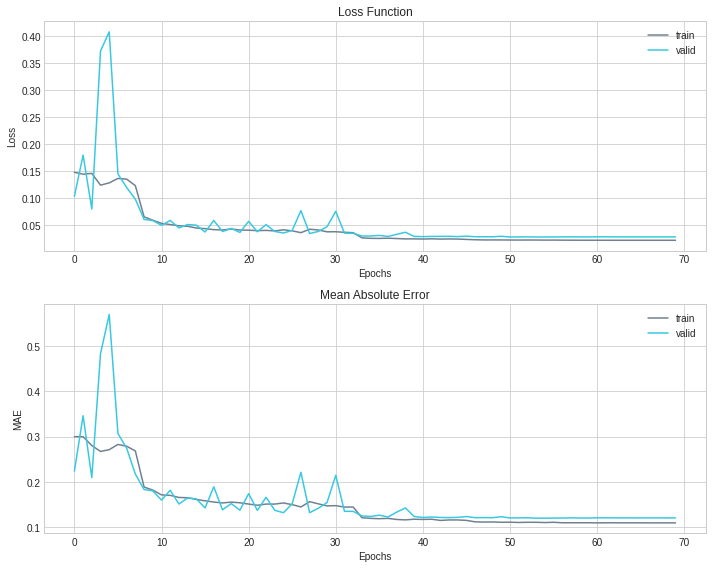

In [40]:
history_plot(mlp_history2,30)

In [41]:
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
nn_scores('MLP; \nNumeric & Encoded Categorical Features;'+\
          ' \nAverage ELA Proficiency', 
          y_train2,y_valid2,y_test2,
          y_train_mlp2,y_valid_mlp2,y_test_mlp2)

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; 
Numeric & Encoded Categorical Features; 
Average ELA Proficiency
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8240282809307162
EV score. Valid:  0.7915993038527462
EV score. Test:  0.8206891928349063
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8240010724427045
R2 score. Valid:  0.7913450154136284
R2 score. Test:  0.8157141752620494
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.022424961307227587
MSE score. Valid:  0.028682782123323283
MSE score. Test:  0.023976122750775996
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.10889272211553454
MAE score. Valid:  0.1198224675509734
MAE score. Test:  0.12050855375293244
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.08345855236053468
MdAE score. Valid:  0.09324071884155272
MdAE score. Test:  0.10272272

It is difficult to achieve high accuracy here in general since the ultimate goal depends <br/> not only on financing, social environment and professionalism of the staff <br/> but also on personal qualities of the students.

But the success of predictions by multilayer perceptrons (`MLP`) is obvious.

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Findings-7</h1>

[PASSNYC. 32 School Districts and D5. Part 2](https://lww.kaggle.com/olgabelitskaya/passnyc-32-school-districts-and-d5-part-2) 

<p style='color:slategray;'>is the seventh look at the main dataset (with additional datasets) <br/><br/> => data analyzing with safety and ethnic parameters and specifics of advanced school activity.</p>

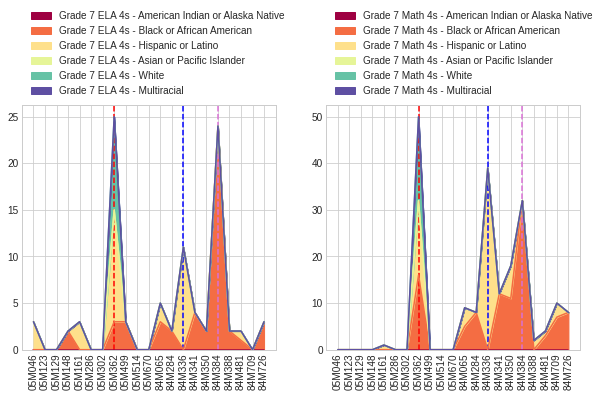

In [42]:
def district5_grade_4s(n):
    fig,ax=plt.subplots(ncols=2,figsize=(10,4.5))
    for i in [0,1]:
        col=[n+i*10,n+1+i*10,n+2+i*10,
             n+3+i*10,n+4+i*10,n+5+i*10]
        d5_shsat_2016[d5_shsat_2016.columns[col]]\
        .plot.area(ax=ax[i],cmap=plt.cm.Spectral)
        ax[i].vlines(7,0,70,linestyle="--",color='red') 
        ax[i].vlines(13,0,70,linestyle="--",color='blue')
        ax[i].vlines(16,0,70,linestyle="--",color='orchid')
        ax[i].legend(loc=3, bbox_to_anchor=(0,1))
        ax[i].set_xticks(list(range(0,21)))
        ax[i].set_xticklabels(list(d5_shsat_2016['Location Code']),
                              rotation=90)
district5_grade_4s(101)

<p style='color:slategray;'>Three leaders among the schools from the 5th District have different and unique places in the ethnic environment:</p>

- in one case, many groups demonstrate great results, 

- in the second case, there are a lot of `Hispanic or Latino` successful students and 

- in the third case, many `Black or African American` pupils have high scores.

<p style='color:slategray;'>All these specifics can be used for the choice of a comfortable environment for concrete students:</p> 

- are they prefer a multicultural environment or monoethnic groups. 


In [43]:
crime_list=['Major N','Oth N','NoCrim N','Prop N','Vio N']
safety.rename(columns={'Location Code':'Location Code 2'},
              inplace=True)
safety.rename(columns={'DBN':'Location Code'},inplace=True)
schoolexplorer_safety=\
safety[crime_list+['Location Code']].dropna()
schoolexplorer_safety=schoolexplorer_safety\
.groupby(['Location Code'],as_index=False)[crime_list].sum()
schoolexplorer_safety=\
pd.merge(school_explorer,schoolexplorer_safety,
         on='Location Code')
d5shsat_safety=safety[crime_list+['Location Code']].dropna()
d5shsat_safety=d5shsat_safety\
.groupby(['Location Code'],as_index=False)[crime_list].sum()
d5shsat_safety=\
pd.merge(d5_shsat_2016,d5shsat_safety,on='Location Code')
districts_safety=\
schoolexplorer_safety[crime_list+['District']].dropna()
districts_safety=districts_safety\
.groupby(districts_safety['District'])\
.sum().sort_index()
districts_safety=districts_safety\
.append(districts_safety.loc[9]).sort_index()
districts_safety=districts_safety.reset_index(drop=True)
districts_safety=pd.concat([districts,districts_safety],axis=1)
[schoolexplorer_safety.shape,
 d5shsat_safety.shape,districts_safety.shape]

[(719, 164), (7, 160), (33, 149)]

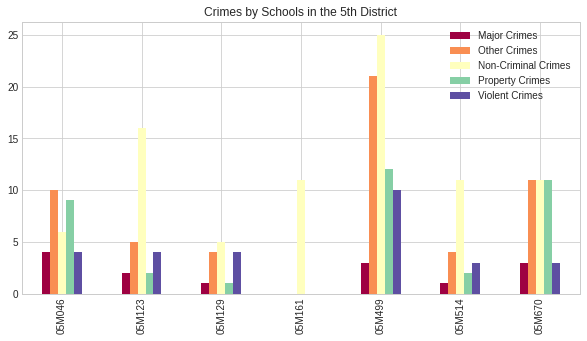

In [44]:
fig=plt.figure(figsize=(10,5)) 
ax=fig.gca() 
d5shsat_safety[crime_list]\
.plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Crimes by Schools in the 5th District')
handles,labels=ax.get_legend_handles_labels()
labels=['Major Crimes','Other Crimes',
        'Non-Criminal Crimes',
        'Property Crimes','Violent Crimes']
ax.legend(handles,labels)
ax.set_xticklabels(list(d5shsat_safety['Location Code']));

<p style='color:slategray;'>In the databases obtained with the integration of educational results and incidents, there is no information about many schools in the 5th District:</p>

- no incidents or no information about them?

<p style='color:slategray;'>It requires to increase awareness of this parameter: perhaps this is the reason for declining in the indicators of study in some cases.<br/><br/>
In this case, it is necessary to pay attention to preventing offenses and involving adolescents in sports and additional education.</p>

In [45]:
high_school.rename(columns={'dbn':'Location Code'},
                   inplace=True)
hsl=high_school[['Location Code',
                 'language_classes']].dropna()
hsl['language_classes']=hsl['language_classes'].\
apply(lambda x:x.split(', '))
hsl=hsl.reset_index(drop=True)
languages=[]
for i in range(len(hsl)):
    l_list=list(set(hsl['language_classes'][i]))
    for l in l_list:
        if l not in languages: languages.append(l)
languages=sorted(languages)
for l in languages: hsl[l]=0
for i in range(len(hsl)):
    for l in languages:
        if l in hsl['language_classes'][i]:
            hsl.loc[i,l]=1
hsl=hsl.drop(['language_classes'],axis=1)
hsl['District']=hsl['Location Code']\
.apply(lambda x:int(x[:2]))             
districts_hsl=hsl.groupby('District').sum()
districts_hsl.reset_index(level=0,inplace=True)
hsa=high_school[['Location Code',
                 'advancedplacement_courses']].dropna()
hsa['advancedplacement_courses']=\
hsa['advancedplacement_courses']\
.apply(lambda x:x.split(', '))
hsa=hsa.reset_index(drop=True)
courses=[]
for i in range(len(hsa)):
    a_list=list(set(hsa['advancedplacement_courses'][i]))
    for a in a_list:
        if a not in courses: courses.append(a)
courses=sorted(courses)
for a in courses: hsa[a]=0
for i in range(len(hsa)):
    for a in courses:
        if a in hsa['advancedplacement_courses'][i]:
            hsa.loc[i,a]=1            
hsa=hsa.drop(['advancedplacement_courses',
              'Latin','Spanish'],axis=1)
hsa['District']=hsa['Location Code']\
.apply(lambda x:int(x[:2]))                 
districts_hsa=hsa.groupby('District').sum()
districts_hsa.reset_index(level=0,inplace=True)
districts_hsl.shape, districts_hsa.shape

((32, 25), (32, 25))

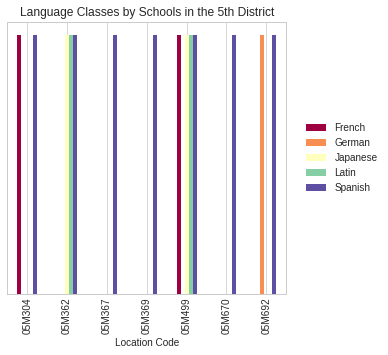

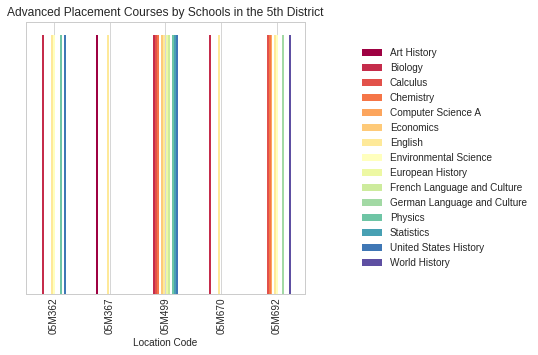

In [46]:
hsl5d=hsl[hsl['District']==5]
hsl5d=hsl5d.loc[:,(hsl5d!=0).any(axis=0)]\
.set_index(hsl5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hsl5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Language Classes by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.2,.5))
ax.set_yticks([])
hsa5d=hsa[hsa['District']==5]
hsa5d=hsa5d.loc[:,(hsa5d!=0).any(axis=0)]\
.set_index(hsa5d['Location Code'])
fig=plt.figure(figsize=(5,5)); ax=fig.gca()
hsa5d.iloc[:,1:-1].plot.bar(ax=ax,cmap=plt.cm.Spectral)
plt.title('Advanced Placement Courses '+\
          'by Schools in the 5th District')
ax.legend(loc=10,bbox_to_anchor=(1.5,.5))
ax.set_yticks([]);

<p style='color:slategray;'>Visualization allows allocating schools paying attention to language training, additional courses, and sports activity:</p>

- one of the leaders (`05M362`) in terms of academic indicators in the 5th District is on the graph in the last two sections.

- information about the other two mentioned leaders is missing in the downloaded files, but it can easily be found on the pages of these schools on the Internet.

<p style='color:slategray;'>For students in the categories</p>

- `Economically Disadvantaged` and 

- `Limited English Proficient` 

<p style='color:slategray;'>in the schools with a high level of advanced activity the supporting needs especially to be an active part of all these programs.</p>

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Conclusion</h1>

1) Schools with a high level of results, in which it is necessary to support certain categories of students, and schools in which the situation needs to be changed in a coordinated manner are identified.

2) Indirectly confirmed by several types of algorithms the presence of ethnic and economic biases in educational results, as well as the degree of influence of individual indicators.

3) The information gathered in the main database allows to predict enough accurately the economic situation and the educational results of the school with the help of various regression algorithms (including neural networks).

<p style='color:slategray;'>Some additional information could help to reach more advanced levels of analysis and prediction in the main dataset.</p>

1) The variable `Local Code` could include the fields `District`, `City Part`, '`City`, `School Type`, `Unique Number`.

   - For example, `05-MNY-0112P-105` can mean 
   
   `5th District, Manhatten, NYC, Grades from 1 to 12 and Private or `
   
   `just an ID of the concrete school type, N105`.

2) Information about crime and fire incidents is needed for complete imagine about the social environment for each school.

3) Infomation about advanced school activity is needed to characterize the educational process in general.

4) The unified file form for each year helps to catch the tendencies in the time series.

5) Indexing of economic activity in districts allows predicting school incomes more accurately.